# Hands On ML Chapter 8 - Dimensionality Reduction

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding

## PCA

PCA choose the axis that store the largest amount of variance in the training set. Then finds another axis, orthogonal to the first one, which has the largest amount of remaining variance. And so on. It depends how many axes you chose.

PCA reduce features with saving as much variance as possible.

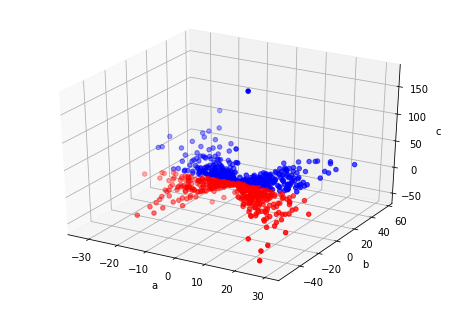

In [38]:
a = 10 * np.random.randn(1000,1)
b = a * np.random.randn(1000,1) + np.random.rand(1000,1)
c = b + np.random.rand(1000,1)/b + np.random.rand(1000,1)

X = np.concatenate((a,b,c), axis=1)
y = np.array([True if i > np.mean(c) else False for i in c])


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0][y==False],X[:,1][y==False],X[:,2][y==False], c="r" )
ax.scatter(X[:,0][y==True],X[:,1][y==True],X[:,2][y==True], c="b")
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.set_zlabel("c")

In [39]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)
pca.explained_variance_ratio_

array([ 0.63874087,  0.30579985])

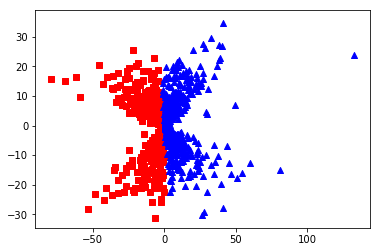

In [40]:
plt.scatter(X2D[:,0][y==False], X2D[:,1][y==False], c='r', marker='s')
plt.scatter(X2D[:,0][y==True], X2D[:,1][y==True],  c='b', marker='^')

### Choosing the right number of dimensions

float value in n_components means you choose ratio of variance

In [41]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X)

### PCA for Compression

You can use PCA to compress your data. For example with MNIST dataset with saving 95% of variance you reduce dimensions from 784 to 150. You can decompress data but it will not be exatly same.

In [42]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)

### Incremental PCA

For big datasets you can use Incremental PCA which split training set into smaller batches feed IPCA one batch at a time.

In [50]:
n_batches = 100
inc_pca = IncrementalPCA(n_components = 2)
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)

X_ipca= inc_pca.transform(X)

## Same but with numpy for binary file from disk:
#X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m,n))
#batch_size = m // n_batches
#inc_pca = IncrementalPCA(n_components = 154, batch_size = batch_size)
#inc_pca.fit(X_mm)

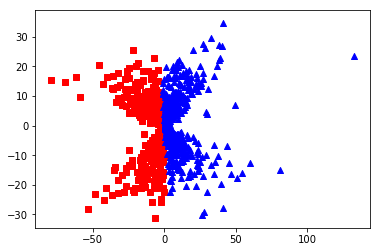

In [51]:
plt.scatter(X_ipca[:,0][y==False], X_ipca[:,1][y==False], c='r', marker='s')
plt.scatter(X_ipca[:,0][y==True], X_ipca[:,1][y==True],  c='b', marker='^')

### Randomize PCA

In [52]:
rnd_pca = PCA(n_components=2, svd_solver="randomized")
X_rand = rnd_pca.fit_transform(X)

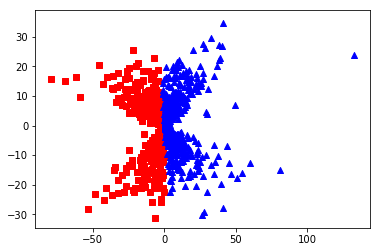

In [49]:
plt.scatter(X_rand[:,0][y==False], X_rand[:,1][y==False], c='r', marker='s')
plt.scatter(X_rand[:,0][y==True], X_rand[:,1][y==True],  c='b', marker='^')

## Kernel PCA

Kernel PCA performs comples nonlinear projections for dimensionality reduction. 

Use it for nonlinear datasets.

In [53]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_kernel = rbf_pca.fit_transform(X)

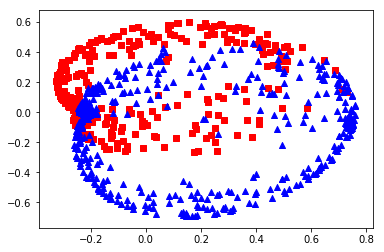

In [55]:
plt.scatter(X_kernel[:,0][y==False], X_kernel[:,1][y==False], c='r', marker='s')
plt.scatter(X_kernel[:,0][y==True], X_kernel[:,1][y==True],  c='b', marker='^')

### Selecting Kernel and Tuning Hyperparameters

In [63]:
clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X,y)
grid_search.best_params_

{'kpca__gamma': 0.029999999999999999, 'kpca__kernel': 'sigmoid'}

In [65]:
grid_pca = grid_search.best_estimator_
grid_pca.fit(X,y)

Pipeline(steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=0.029999999999999999,
     kernel='sigmoid', kernel_params=None, max_iter=None, n_components=2,
     n_jobs=1, random_state=None, remove_zero_eig=False, tol=0)), ('log_re...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

## LLE

Another Dimensionality Reduction technique.

In [45]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = lle.fit_transform(X)

In [46]:
X_lle

array([[ 0.00337196,  0.00435709],
       [ 0.00170759,  0.013355  ],
       [ 0.00519308,  0.01134451],
       ..., 
       [ 0.0033826 ,  0.00471224],
       [ 0.0012238 ,  0.01469855],
       [-0.00146326,  0.03370824]])

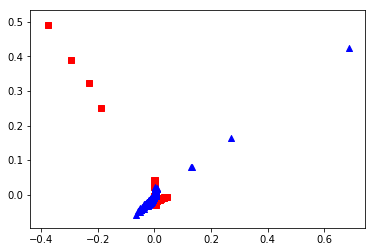

In [47]:
plt.scatter(X_lle[:,0][y==False], X_lle[:,1][y==False], c='r', marker='s')
plt.scatter(X_lle[:,0][y==True], X_lle[:,1][y==True],  c='b', marker='^')